In [568]:
import compare_LSTM as compare
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [569]:
importlib.reload(compare)

<module 'compare_LSTM' from '/Users/jamessmith/Google_Drive/Stanford/Research/LDS_RNNS/code/RNNs/compare_LSTM.py'>

In [570]:
##Dimensions##                                                                   
D1=3 #h_t and c_t dimension                                                      
D2 =2 #u_t dimension   

In [571]:
##Random Weights##                                                               
Wi = np.random.randn(D1,D1+D2)
Wf = np.random.randn(D1,D1+D2)
Wo = np.random.randn(D1,D1+D2)
Wg = np.random.randn(D1,D1+D2)

bi =np.random.randn(D1)
bf =np.random.randn(D1)
bo =np.random.randn(D1)
bg =np.random.randn(D1)

In [572]:
##Initialize##                                                                   
c = 0*np.ones(D1) #Initial cell state                                              
h = 0*np.ones(D1) #Initial hidden state                                            
u = 0*np.ones(D2) #Constant inputs (same input every step for now)                                               

T = 100 #Timesteps  

In [573]:
##Generate Vanilla LSTM and store data for plotting                                                                                                                                    
c_vec1 = np.zeros((len(c),T))
h_vec1 = np.zeros((len(h),T))
i_vec1 = np.zeros((len(h),T))
f_vec1 = np.zeros((len(h),T))
o_vec1 = np.zeros((len(h),T))
g_vec1 = np.zeros((len(h),T))

for t in range(0,T):                                                             
    i,f,o,g,c,h =compare.LSTM_step(u, h, c, Wi,Wf,Wo,Wg,bi,bf,bo,bg)  
    c_vec1[:,t] = c
    h_vec1[:,t] = h
    i_vec1[:,t] = i
    f_vec1[:,t] = f
    o_vec1[:,t] = o
    g_vec1[:,t] = g
    
    
    

In [574]:
#Stochastic LSTM hyperparameters                                                 
alpha1 = 1.5
alpha2 = 1.5
tau1 = 1
tau2 =1
sigma1 = .1
sigma2 = .1
sigma3 = .1

In [575]:
#Generate Stochastic LSTM and store data for plotting                                                     
c_vec = np.zeros((len(c),T))
h_vec = np.zeros((len(h),T))
i_vec = np.zeros((len(h),T))
f_vec = np.zeros((len(h),T))
o_vec = np.zeros((len(h),T))
g_vec = np.zeros((len(h),T))

for t in range(0,T):
    c,h, zi, zf, zo, g = compare.stoch_LSTM_step(u,h,c,Wi,Wf,Wo,Wg,bi,bf,bo,bg,alpha1,alpha2,
                                                    tau1,tau2,sigma1,sigma2,sigma3)
    c_vec[:,t] = c
    h_vec[:,t] = h
    i_vec[:,t] =zi
    f_vec[:,t] =zf
    o_vec[:,t] =zo
    g_vec[:,t] =g


t_vec = np.arange(0,T,1)

In [576]:
#Approximate steady state time (for plot of rough averages)
ss = 5

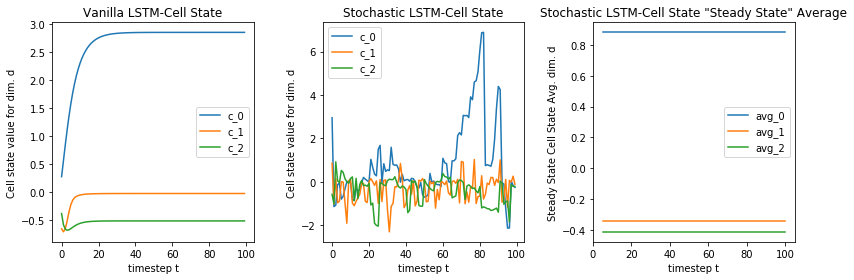

In [577]:
##Cell state
plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
for i in range(0,len(c)):
    plt.plot(t_vec, c_vec1[i][:], label='c_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Cell state value for dim. d')
plt.title('Vanilla LSTM-Cell State')


plt.subplot(1,3,2)
for i in range(0,len(c)):
    plt.plot(t_vec, c_vec[i][:], label='c_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Cell state value for dim. d')
plt.title('Stochastic LSTM-Cell State')

plt.subplot(1,3,3)
for i in range(0,len(h)): 
    avg = np.average(c_vec[i][ss:])
    plt.plot([ss,T], [avg,avg], label='avg_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Steady State Cell State Avg. dim. d')
plt.title('Stochastic LSTM-Cell State "Steady State" Average')

plt.tight_layout()
plt.show()

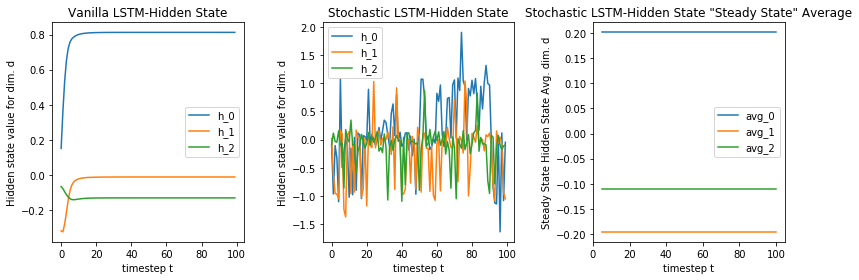

In [578]:
##Hidden state
plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
for i in range(0,len(h)):
    plt.plot(t_vec, h_vec1[i][:], label='h_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Hidden state value for dim. d')
plt.title('Vanilla LSTM-Hidden State')


plt.subplot(1,3,2)
for i in range(0,len(h)):
    plt.plot(t_vec, h_vec[i][:], label='h_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Hidden state value for dim. d')
plt.title('Stochastic LSTM-Hidden State')

plt.subplot(1,3,3)
for i in range(0,len(h)): 
    avg = np.average(h_vec[i][ss:])
    plt.plot([ss,T], [avg,avg], label='avg_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Steady State Hidden State Avg. dim. d')
plt.title('Stochastic LSTM-Hidden State "Steady State" Average')

plt.tight_layout()
plt.show()

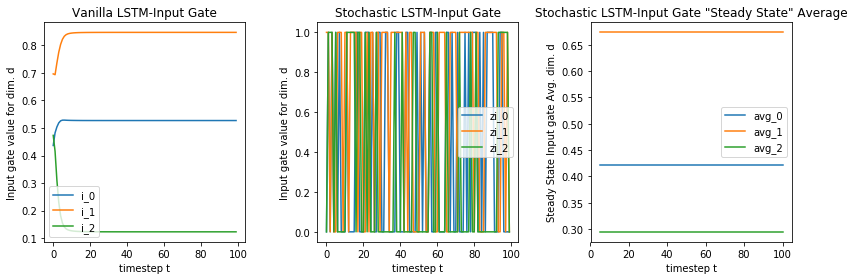

In [579]:
##Input Gate
plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
for i in range(0,len(h)):
    plt.plot(t_vec, i_vec1[i][:], label='i_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Input gate value for dim. d')
plt.title('Vanilla LSTM-Input Gate')


plt.subplot(1,3,2)
for i in range(0,len(h)):
    plt.plot(t_vec, i_vec[i][:], label='zi_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Input gate value for dim. d')
plt.title('Stochastic LSTM-Input Gate')

plt.subplot(1,3,3)
for i in range(0,len(h)): 
    avg = np.average(i_vec[i][ss:])
    plt.plot([ss,T], [avg,avg], label='avg_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Steady State Input gate Avg. dim. d')
plt.title('Stochastic LSTM-Input Gate "Steady State" Average')


plt.tight_layout()
plt.show()

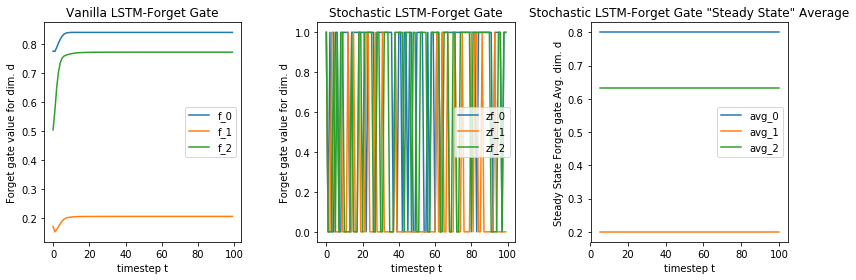

In [580]:
##Forget Gate
plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
for i in range(0,len(h)):
    plt.plot(t_vec, f_vec1[i][:], label='f_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Forget gate value for dim. d')
plt.title('Vanilla LSTM-Forget Gate')


plt.subplot(1,3,2)
for i in range(0,len(h)):
    plt.plot(t_vec, f_vec[i][:], label='zf_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Forget gate value for dim. d')
plt.title('Stochastic LSTM-Forget Gate')

plt.subplot(1,3,3)
for i in range(0,len(h)): 
    avg = np.average(f_vec[i][ss:])
    plt.plot([ss,T], [avg,avg], label='avg_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Steady State Forget gate Avg. dim. d')
plt.title('Stochastic LSTM-Forget Gate "Steady State" Average')

plt.tight_layout()
plt.show()

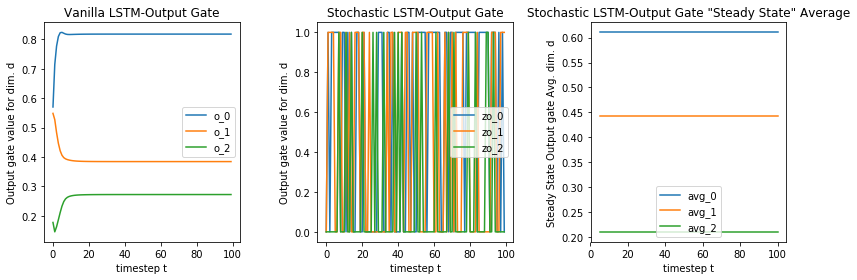

In [581]:
##Output gate
plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
for i in range(0,len(h)):
    plt.plot(t_vec, o_vec1[i][:], label='o_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Output gate value for dim. d')
plt.title('Vanilla LSTM-Output Gate')


plt.subplot(1,3,2)
for i in range(0,len(h)):
    plt.plot(t_vec, o_vec[i][:], label='zo_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Output gate value for dim. d')
plt.title('Stochastic LSTM-Output Gate')

plt.subplot(1,3,3)
for i in range(0,len(h)): 
    avg = np.average(o_vec[i][ss:])
    plt.plot([ss,T], [avg,avg], label='avg_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Steady State Output gate Avg. dim. d')
plt.title('Stochastic LSTM-Output Gate "Steady State" Average')


plt.tight_layout()
plt.show()


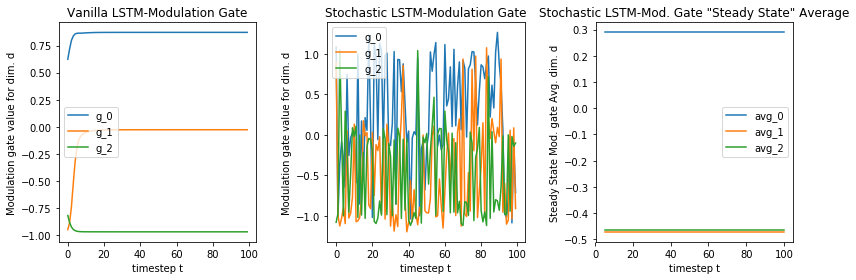

In [582]:
## g-gate (Output Modulation gate)
plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
for i in range(0,len(h)):
    plt.plot(t_vec, g_vec1[i][:], label='g_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Modulation gate value for dim. d')
plt.title('Vanilla LSTM-Modulation Gate')


plt.subplot(1,3,2)
for i in range(0,len(h)):
    plt.plot(t_vec, g_vec[i][:], label='g_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Modulation gate value for dim. d')
plt.title('Stochastic LSTM-Modulation Gate')

plt.subplot(1,3,3)
for i in range(0,len(h)): 
    avg = np.average(g_vec[i][ss:])
    plt.plot([ss,T], [avg,avg], label='avg_{}'.format(i))
plt.legend()    
plt.xlabel('timestep t')
plt.ylabel('Steady State Mod. gate Avg. dim. d')
plt.title('Stochastic LSTM-Mod. Gate "Steady State" Average')

plt.tight_layout()
plt.show()